## Question: Can we predict if a person will pay their loan on time?

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold


### Data loading and exploration

In [53]:
loan = pd.read_csv('Loan payments data.csv')

loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [54]:
loan.head(20)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [55]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,200.0,36.010,29.380880,1.0,3.0,37.0,60.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


In [56]:
loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [57]:
loan.duplicated().sum()

0

In [58]:
loan.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [59]:
pandas_profiling.ProfileReport(loan)

### Exploratory Data Analysis

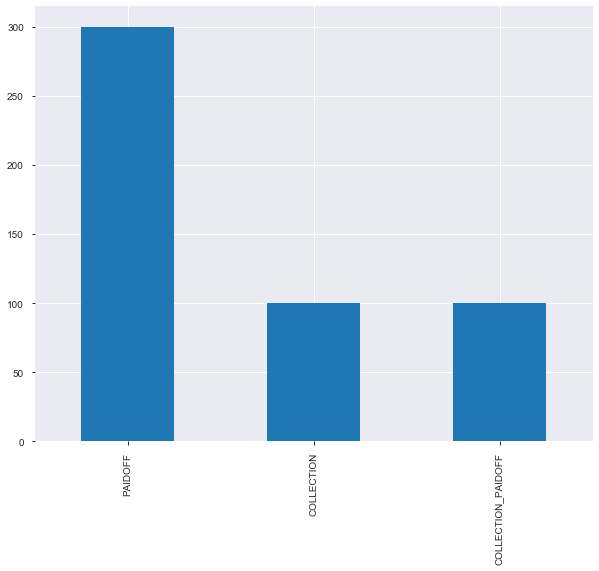

In [60]:
plt.figure(figsize=(10,8))
loan['loan_status'].value_counts().plot.bar()

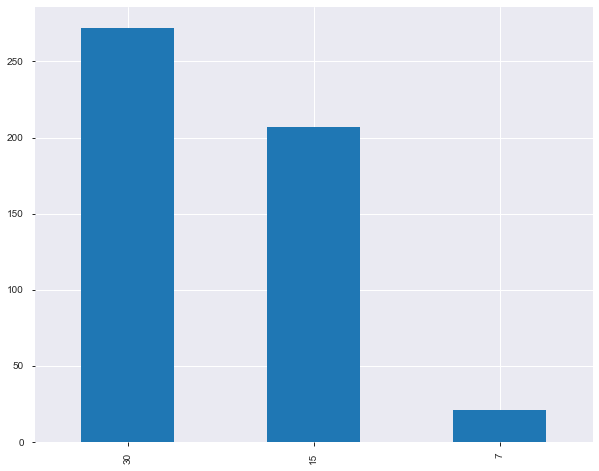

In [61]:
## the terms figures represent number of days
## seems most people takeout 30 day loans

plt.figure(figsize=(10,8))
loan['terms'].value_counts().plot.bar()

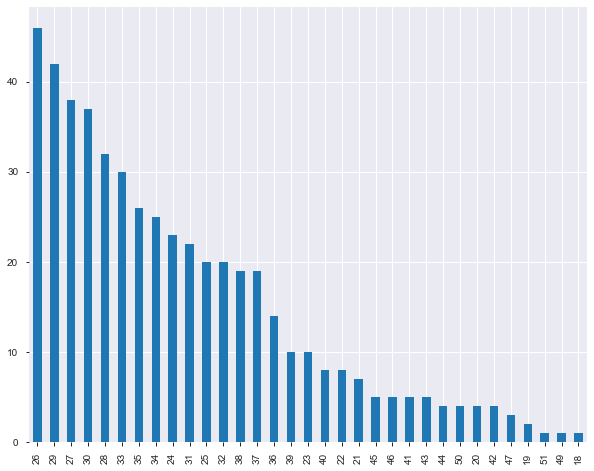

In [62]:
## seems like a majority of the poeple borrowing are from between the ages of 25 - 35

plt.figure(figsize=(10,8))
loan['age'].value_counts().plot.bar()

<Figure size 720x576 with 0 Axes>

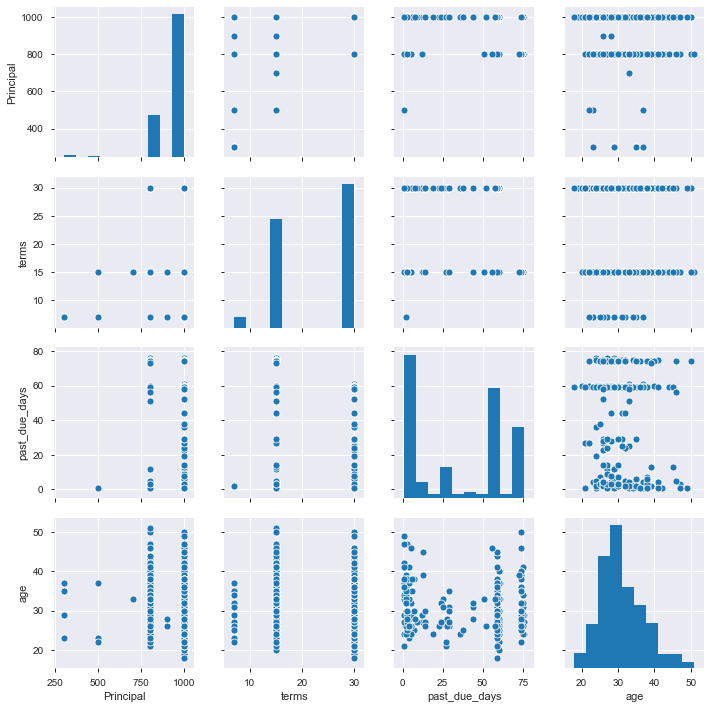

In [63]:
plt.figure(figsize=(10,8))


sns.pairplot(loan)

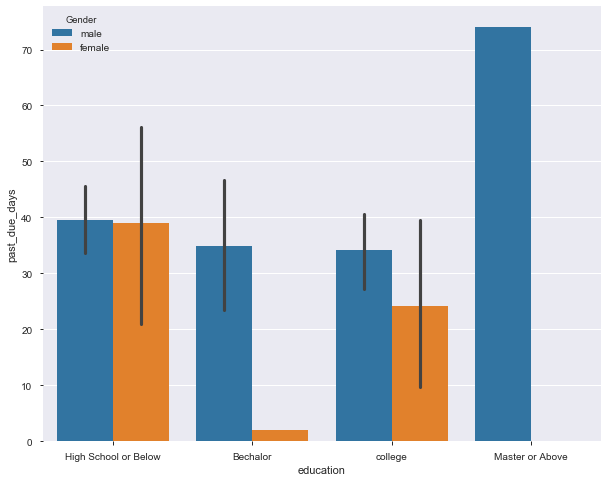

In [64]:
#seems like males with masters degrees or above dont pay their debts

plt.figure(figsize=(10,8))
sns.barplot(x="education",y="past_due_days",data=loan,hue="Gender")

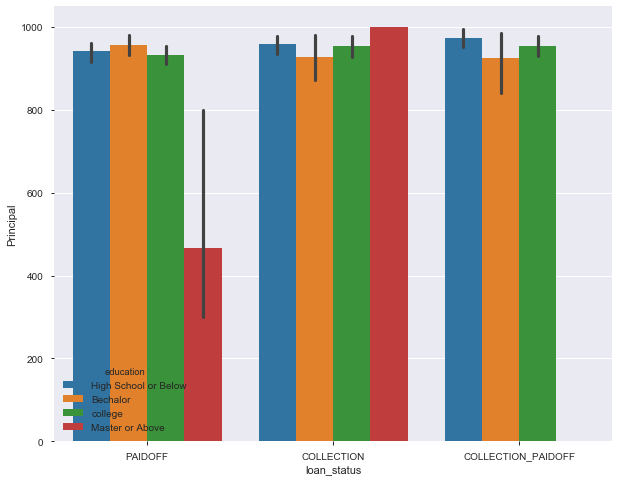

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x="loan_status",y="Principal",data=loan,hue="education")

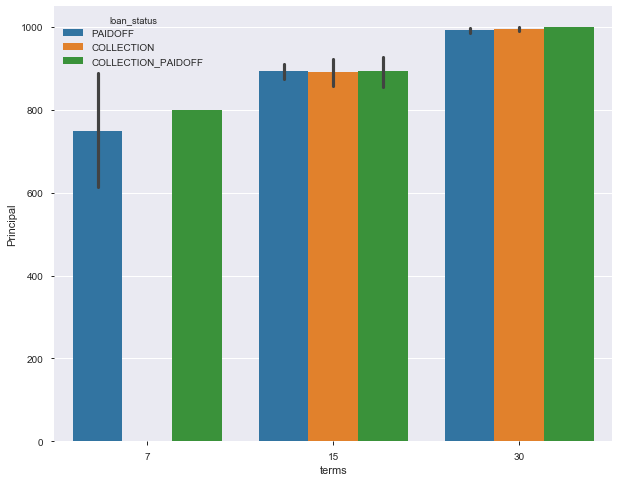

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x="terms",y="Principal",data=loan,hue="loan_status")

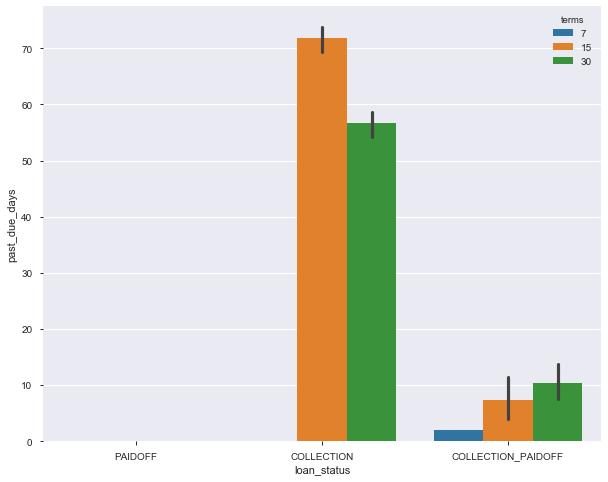

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'loan_status',y = 'past_due_days',data = loan,hue = 'terms')

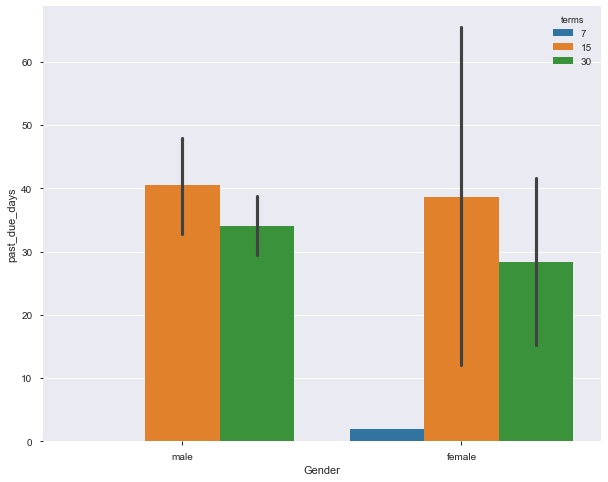

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Gender',y = 'past_due_days',data = loan,hue = 'terms')

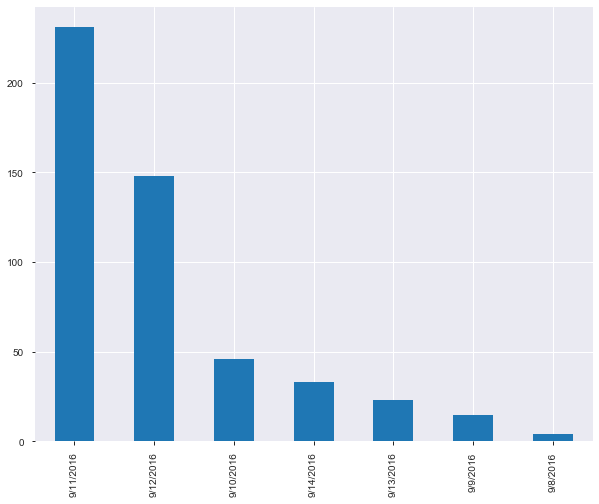

In [69]:
plt.figure(figsize=(10,8))
loan['effective_date'].value_counts().plot.bar()

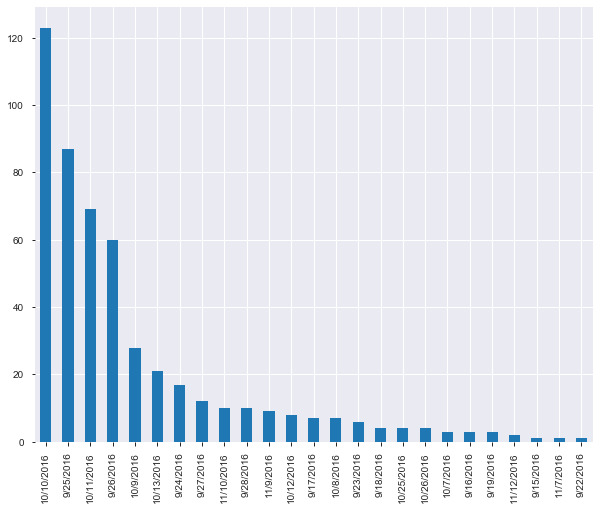

In [70]:
plt.figure(figsize=(10,8))
loan['due_date'].value_counts().plot.bar()

### Feature Engineering

In [71]:
## first step is dropping irrelevant columns

# cols = ['Loan_ID','due_date','paid_off_time','effective_date']
loans = loan.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1)
    
    

In [72]:
loans.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [73]:
## impute all the NANs with 0 since they represent due dates that were paid


loans['past_due_days'] = loans['past_due_days'].fillna(0)

In [74]:
loans.isna().sum()

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64

### Modelling

In [75]:
import category_encoders as ce

In [76]:
encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'None':0,'High School or Below':1,'college':2,'Bechalor':3,'Master or Above':4}}])

In [77]:
loans_t = encoder.fit_transform(loans)

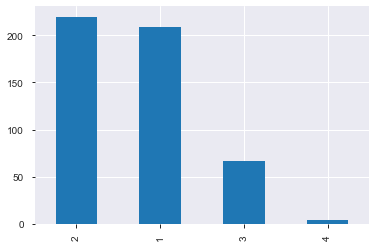

In [78]:
loans_t['education'].value_counts().plot.bar()

In [79]:
loans_t.dtypes

loan_status       object
Principal          int64
terms              int64
past_due_days    float64
age                int64
education          int32
Gender            object
dtype: object

In [80]:
loans_t

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0.0,45,1,male
1,PAIDOFF,1000,30,0.0,50,3,female
2,PAIDOFF,1000,30,0.0,33,3,female
3,PAIDOFF,1000,15,0.0,27,2,male
4,PAIDOFF,1000,30,0.0,28,2,female
...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,3.0,28,1,male
496,COLLECTION_PAIDOFF,1000,15,14.0,26,1,male
497,COLLECTION_PAIDOFF,800,15,3.0,30,2,male
498,COLLECTION_PAIDOFF,1000,30,1.0,38,2,female


In [81]:
gender = {'male' : 0, 'female' : 1}

loans_t['Gender'] = loans_t['Gender'].map(gender)

In [82]:
status = {'PAIDOFF': 0 , 'COLLECTION' : 1,'COLLECTION_PAIDOFF' : 2}

loans_t['loan_status'] = loans_t['loan_status'].map(status)

In [83]:
target = loans_t['loan_status']

loans_t.drop(['loan_status'],axis = 1,inplace = True)

In [84]:
target = target.astype("category")

In [85]:
loans_t.dtypes

Principal          int64
terms              int64
past_due_days    float64
age                int64
education          int32
Gender             int64
dtype: object

In [86]:
loans_t[['Gender','education']] = loans_t[['Gender','education']].astype("category")

In [87]:
x = loans_t
y = target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
prediction=dt.predict(X_test)

f1=f1_score(y_test,prediction,average='weighted')

print("f1 Score:{}".format(f1))

f1 Score:0.973221873911529


In [90]:
import pickle
pickle_out = open("loan_classifier.pkl","wb")
pickle.dump(dt,pickle_out)
pickle_out.close()

In [91]:
data = np.array([700,15,1,35,2,0]).reshape(1,-1)
dt.predict(data)

array([2], dtype=int64)